# El Teorema del Límite Central

En la lección anterior hablamos de la distribución muestral, que corresponde a la distribución que tendrá el parámetro estadístico que estimemos a partir de cada muestra.

En esta lección partiremos de este concepto de la distribución muestral para comprender un teorema fundamental de la Estadística Inferencial: el Teorema del Límite Central.

Para entender este teorema partiremos nuevamente de un ejemplo práctico el cual nos permitirá construir de manera intuitiva este concepto.

Después de esto veremos una definición formal del teorema y los principales usos que tiene en la Ciencia de Datos y el Machine Learning.

## 1. Ejemplo práctico

Comencemos cargando el set de datos *dataset-multiples-distribuciones.csv*. Este set de datos contiene 1000 filas (o datos) y un total de 4 columnas (o variables). Como veremos en un momento, las variables tendrán estas distribuciones:

- Primera columna: distribución Gaussiana (o Normal)
- Segunda columna: distribución uniforme
- Tercera columna: distribución bimodal
- Cuarta columna: distribución sesgada hacia la izquierda

Leamos entonces el set de datos:

In [8]:
# Leer set de datos
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ruta ="/Users/hectorrr/proyectos/pruebas prametricas/dataset-multiples-distribuciones.csv"
df = pd.read_csv(ruta)
df=df.rename(columns={"d1":"normal",
                      "d2":"uniforme",
                      "d3":"bimodal",
                      "d4":"sesgada a la izquierda"})
df


,normal,uniforme,bimodal,sesgada a la izquierda
0,0.496714,1.674826,1.845395,0.857140
1,-0.138264,1.045678,1.623922,0.490894
2,0.647689,6.364302,2.159587,2.558910
3,1.523030,7.064757,2.670225,1.045641
4,-0.234153,0.315861,1.062414,1.626407
...,...,...,...,...
995,-0.281100,2.806832,7.350235,1.360154
996,1.797687,2.069926,6.796799,1.259594
997,0.640843,5.165726,6.957956,2.381441
998,-0.571179,0.055058,7.512797,1.755789


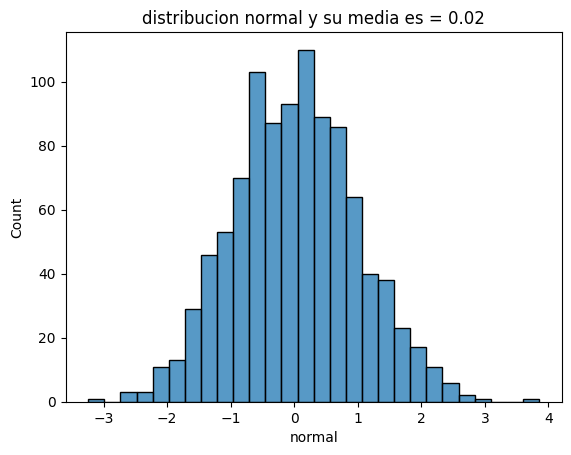

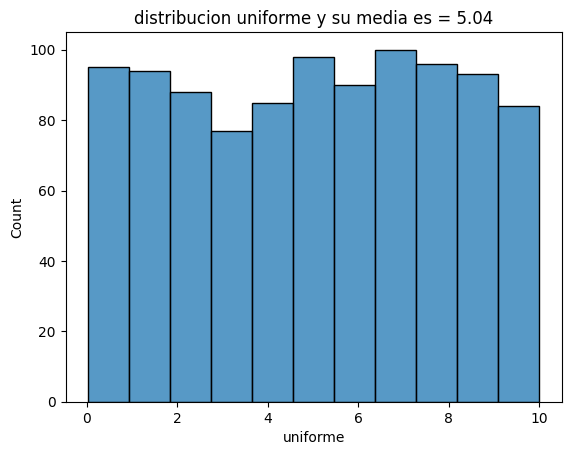

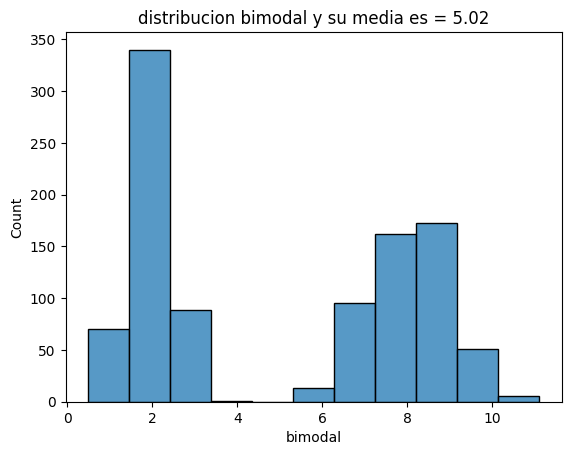

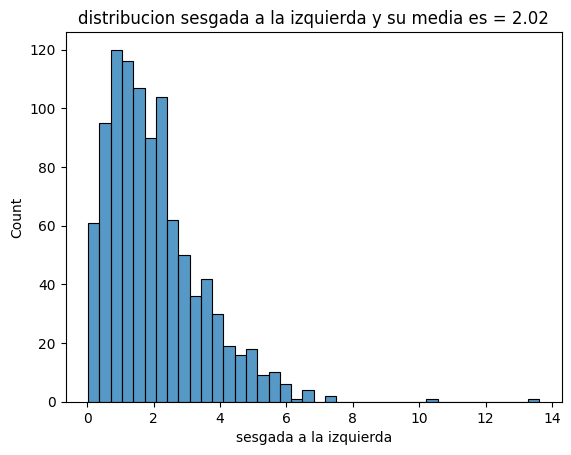

In [10]:
for i in df.columns:
    plt.Figure(figsize=(6,5))
    sns.histplot(df[i])
    plt.title(f'distribucion {i} y su media es = {df[i].mean():.2f}')
    plt.show()

¡Perfecto!

Vamos a asumir, al igual que en las lecciones anteriores, una situación hipotética: cada columna de este set de datos es una población (a la cual no podríamos acceder en la práctica).

Para tener claras las características de estas poblaciones dibujemos sus histogramas y en cada gráfico agreguemos el valor de sus medias:

In [12]:
df.columns

Index(['normal', 'uniforme', 'bimodal', 'sesgada a la izquierda'], dtype='object')

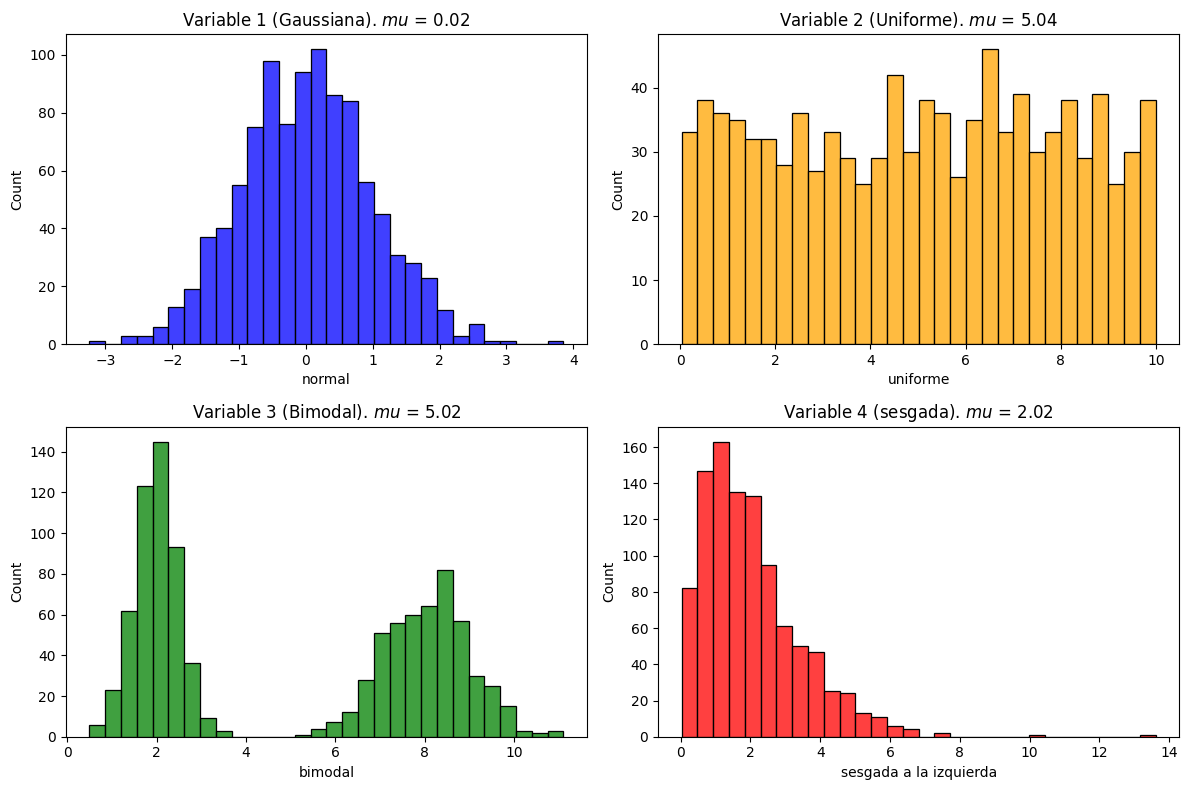

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear figure con 4 "subplots"

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Histograma primera columna + media
media1 = df['normal'].mean()
sns.histplot(df['normal'], ax=axs[0, 0], color='blue', bins=30)
axs[0, 0].set_title(f'Variable 1 (Gaussiana). $mu$ = {media1:.2f}')

# Histograma segunda columna + media
media2 = df['uniforme'].mean()
sns.histplot(df['uniforme'], ax=axs[0, 1], color='orange', bins=30)
axs[0, 1].set_title(f'Variable 2 (Uniforme). $mu$ = {media2:.2f}')

# Histograma tercera columna + media
media3 = df['bimodal'].mean()
sns.histplot(df['bimodal'], ax=axs[1, 0], color='green', bins=30)
axs[1, 0].set_title(f'Variable 3 (Bimodal). $mu$ = {media3:.2f}')

# Histograma cuarta columna + media
media4 = df['sesgada a la izquierda'].mean()
sns.histplot(df['sesgada a la izquierda'], ax=axs[1, 1], color='red', bins=30)
axs[1, 1].set_title(f'Variable 4 (sesgada). $mu$ = {media4:.2f}');

plt.tight_layout()

Muy bien ya tenemos las distribuciones de referencia (poblaciones) y sus respectivas medias.

Ahora viene la parte interesante de este ejercicio. Por cada una de las poblaciones obtengamos las distribuciones muestrales de la media.

Para ello usaremos tamaños de muestra (*n*) de 200 y para obtener cada distribución usaremos un total de 1000 diferentes muestras.

Comencemos creando una pequeña función (`calcular_d_muestral`) que nos permitirá obtener dichas distribuciones muestrales:

In [14]:
# Función para obtener distribuciones muestrales (usando la media de la muestra)
def calcular_d_muestral(arreglo, n=200, trials=1000):
    # Inicializar arreglo que contendrá la distribución
    dm = np.zeros((trials))
    
    # Iterar por el número de "trials" y en cada iteración:
    # Extraer "n" muestras aleatoriamente
    # Calcular la estadística (media de la muestra)
    # Almacenar resultado
    for i in range(trials):
        # Muestreo aleatorio
        muestra = np.random.choice(arreglo, n)
        
        # Calcular estadística y almacenar en la distribución
        dm[i] = np.mean(muestra)
    
    # Al terminar las iteraciones retornar la distribución muestral
    return dm

Perfecto. Con estas función ahora sí podemos obtener las distribuciones muestrales para cada una de las cuatro poblaciones:

In [16]:
# Por cada población obtener las distribuciones muestrales de la media con n = 200 y 
# 1000 trials
dm_d1 = calcular_d_muestral(df['normal'].to_numpy())
dm_d2 = calcular_d_muestral(df['uniforme'].to_numpy())
dm_d3 = calcular_d_muestral(df['bimodal'].to_numpy())
dm_d4 = calcular_d_muestral(df['sesgada a la izquierda'].to_numpy())

Muy bien. Y ahora viene lo más interesante. Por cada una de las distribuciones obtenidas dibujemos:
    
- La distribución de la población original (a la izquierda)
- Y a la derecha su correspondiente distribución muestral

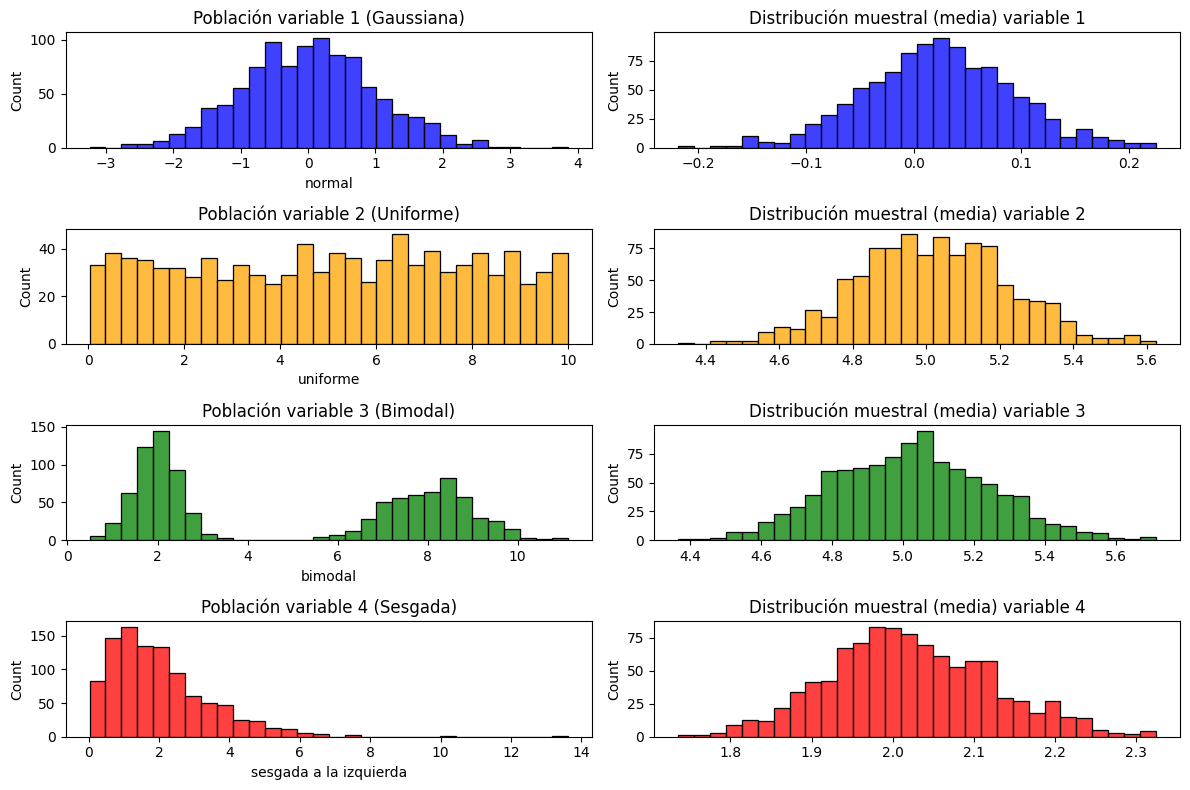

In [18]:
# Crear figura con 4 filas (una por cada población) y 2 columnas (izquierda: distribución
# de la población, derecha: distribución muestral de las medias)
fig, axs = plt.subplots(4, 2, figsize=(12, 8))

# Histogramas columna 1 (población y distribución de las medias)
sns.histplot(df['normal'], ax=axs[0,0], color='blue', bins=30)
axs[0,0].set_title('Población variable 1 (Gaussiana)')

sns.histplot(dm_d1, ax=axs[0,1], color='blue', bins=30)
axs[0,1].set_title('Distribución muestral (media) variable 1')

# Histogramas columna 2 (población y distribución de las medias)
sns.histplot(df['uniforme'], ax=axs[1,0], color='orange', bins=30)
axs[1,0].set_title('Población variable 2 (Uniforme)')

sns.histplot(dm_d2, ax=axs[1,1], color='orange', bins=30)
axs[1,1].set_title('Distribución muestral (media) variable 2')

# Histogramas columna 3 (población y distribución de las medias)
sns.histplot(df['bimodal'], ax=axs[2,0], color='green', bins=30)
axs[2,0].set_title('Población variable 3 (Bimodal)')

sns.histplot(dm_d3, ax=axs[2,1], color='green', bins=30)
axs[2,1].set_title('Distribución muestral (media) variable 3')

# Histogramas columna 4 (población y distribución de las medias)
sns.histplot(df['sesgada a la izquierda'], ax=axs[3,0], color='red', bins=30)
axs[3,0].set_title('Población variable 4 (Sesgada)')

sns.histplot(dm_d4, ax=axs[3,1], color='red', bins=30)
axs[3,1].set_title('Distribución muestral (media) variable 4')

# Ajustar distribución para que no se traslapen las gráficas
plt.tight_layout();

Y acá vemos algo muy interesante y a la vez inesperado: **independientemente de la distribución de la variable original la ¡¡¡distribución muestral de las medias TIENE UNA FORMA GAUSSIANA (O NORMAL)!!!**

Es decir, no importa si la distribución de la población es Gaussiana, Bimodal, si tiene sesgo, si es uniforme o si tiene cualquier forma arbitraria: ¡al obtener la distribución muestral de las medias tendremos una distribución Gaussiana!

Así que con esto ya podemos definir formalmente el teorema del límite central.

## 2. El teorema del límite central

<p></p>
<div style="background-color: #F7CAC9; color: black; padding: 10px;">
    Bajo las condiciones apropiadas la distribución muestral de las medias <b>converge a una distribución normal independientemente de si la distribución de la población es o no gaussiana</b>.
</div>

¡Esto es en esencia lo que ya verificamos en los ejemplos anteriores!

Sin embargo hay que tener en cuenta que para que este teorema sea válido se deben dar unas "condiciones apropiadas". En realidad la condición es que el tamaño de la muestra usada para construir la distribución muestral sea apropiado (en la práctica este valor es de mínimo n=30, como lo verificaremos en un momento).

## 3. El comportamiento de la media de la distribución muestral

Y hay otro resultado interesante que se deriva del teorema del límite central.

Si construimos la distribución muestral de las medias, usando una cantidad adecuada de datos, y calculamos su media (es decir la "media de las medias") **¡¡¡el valor obtenido será prácticamente igual a la media de la población!!!**

Verifiquemos esto de manera práctica. Volvamos a las 4 poblaciones originales y a sus correspondientes distribuciones muestrales y en cada caso imprimamos en pantalla la media de la población y la media de la distribución muestral (media de las medias):

In [8]:
# Imprimir encabezados
print(f"{'Distribución':<15}{'Media población':<30}{'Media de las medias':<30}")
print('='*70)

# Gaussiana
print(f"{'Gaussiana':<15}{df['d1'].mean():<30}{np.mean(dm_d1):<30}")

# Uniforme
print(f"{'Uniforme':<15}{df['d2'].mean():<30}{np.mean(dm_d2):<30}")

# Bimodal
print(f"{'Bimodal':<15}{df['d3'].mean():<30}{np.mean(dm_d3):<30}")

# Sesgada
print(f"{'Sesgada':<15}{df['d4'].mean():<30}{np.mean(dm_d4):<30}")

Distribución   Media población               Media de las medias           
Gaussiana      0.019332055822325493          0.0175414518389742            
Uniforme       5.036488055234082             5.048099477275761             
Bimodal        5.021958134780401             5.025575058111759             
Sesgada        2.023350282076623             2.0228471040441005            


Vemos que efectivamente la media de la distribución muestral es prácticamente igual a la media de la población.

Así que **la distribución muestral de las medias nos permite estimar de manera bastante precisa la media de la población** (siempre y cuando usemos una cantidad suficiente de datos al construir las muestras.

## 4. ¿Cuál es el mínimo tamaño de la muestra?

Hace un momento mencionamos que este valor es de al menos 30. Es decir que para que se cumpla el teorema del límite central y para que podamos tener una buena estimación de la media de la población a partir de la distribución muestral de las medias, se requiere tomar muestras con al menos 30 datos.

Realmente este valor es una aproximación que dependerá de las características propias de los datos, pero en general es una buena aproximación.

Verifiquemos esto de manera práctica. Para ello calcularemos la media de la distribución muestral pero obtenida para diferentes tamaños de muestra (*n*). Luego graficaremos este resultado (medias de la distribución vs. n) y superpondremos el valor real de la población.

La idea es ver con estas gráficas el valor aproximado que debería tener *n* para que la media de las medias se aproxime lo suficiente a la media de la población:

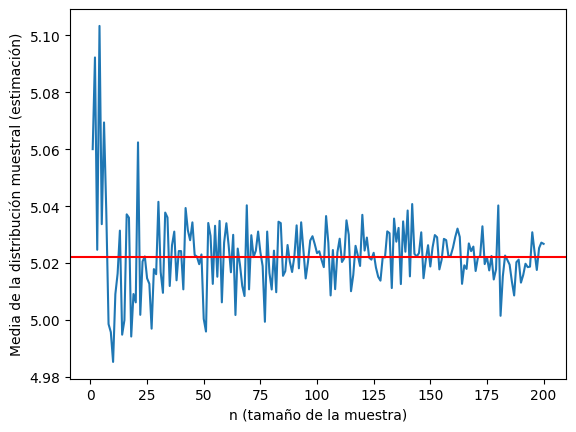

In [12]:
nmuestras = [] # Listado que contendrá los diferentes tamaños de muestra
promedios = [] # Listado que contendrá la media de las distribuciones muestrales para los diferentes "n"
variable = 'd3' # Columna del dataset a analizar

# Iterar sobre 200 valores diferentes de "n" (desde 1 hasta 200) y en cada iteración:
# - Obtener la distribución muestral
# - Calcular y almacenar el promedio de la distribución muestral y el tamaño de la muestra usado
for n in range(1,201):
    dm = calcular_d_muestral(df[variable].to_numpy(), n=n)
    nmuestras.append(n)
    promedios.append(dm.mean())

# Graficar "medias de medias" vs. n
plt.plot(nmuestras, promedios);
plt.xlabel('n (tamaño de la muestra)')
plt.ylabel('Media de la distribución muestral (estimación)');

# Y superponer línea horizontal con el valor real de la media (en la población)
plt.axhline(y = df[variable].mean(), color = 'r', linestyle = '-');

Vemos que en realidad este umbral de 30 muestras no es un número fijo sino que cambia dependiendo de las características de los datos.

Sin embargo sí resulta evidente que con tamaños de muestra "pequeños" (a veces 10, a veces 20, otras veces 25, etc.) la estimación no es tan precisa. Así que un tamaño de muestra de al menos *n=30* es un criterio adecuado para poder aplicar el teorema del límite central.

## 5. Usos del teorema del límite central

1. Con un tamaño de muestra adecuado (mayor o igual a 30) podemos usar el teorema del límite central para estimar de forma bastante precisa la media de la población.
2. Como veremos en las próximas lecciones el teorema del límite central nos permite además cuantificar la confiabilidad que tiene la estadística que usemos para caracterizar nuestros datos, a través de parámetros como el error estándar y los intervalos de confianza.
3. Y en próximos cursos veremos que según lo comentado en (2) el teorema del límite central será usado para aplicar pruebas de hipótesis como la prueba "z" (o *z-test*) o la prueba t (*t-test*), entre otras.

## 6. Aspectos a tener en cuenta

- Si construimos la distribución muestral de las medias de una población (usando tamaños de muestra mayores o iguales a 30) siempre tendremos una distribución muestral con forma Gaussiana (o Normal) independientemente de la forma que tenga la distribución de la población.
- Y si se garantiza lo anterior podremos estimar de forma bastante precisa la media de la población a partir de la distribución muestral de las medias.
- Y lo anterior tendrá aplicaciones en el cálculo del error estándar (el tema de la próxima lección) y de los intervalos de confianza (que veremos más adelante) que en conjunto nos permiten cuantificar el grado de fiabilidad que tendrá la estadística que estemos estimando a partir de las muestras.